In [1]:
# Dependencies
import random
import requests as req

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from citipy import citipy

import openweathermapy as owm

#To get the current date
import datetime
now = datetime.datetime.now()

In [2]:

# Create a settings object with your API key and preferred units# Creat 
api_key = "ea14d7b8c8432ec91fa2ddca0d48cb22"
# Setting the units to imperial to get Fahrenheit reading
settings = {"units": "imperial", "appid": api_key}

In [3]:
# Latitude ranges from -90 to 90 and Longitude ranges from -180 to 180
lat = list(np.arange(-90,90.01,0.01))
long = list(np.arange(-180,180.01,0.01))

# Setting Latitude and Longitude to ramdomly pick co-ordinates.
lat_samples=random.sample(lat,1500)
long_samples=random.sample(long,1500)

# Creating a dataframe from the randomly sample Latitude and Longitude
cities_df=pd.DataFrame({"Latitude":lat_samples,"Longitude":long_samples})

#Creating new columns City and Country for storing the details corresponding to the co-ordinates
cities_df["City"]=""
cities_df["Country"]=""

# Finding the city and the country code corresponding to the Latitude and Longitude
for index,row in cities_df.iterrows():
    city=citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(index, "City", city.city_name)
    cities_df.set_value(index, "Country", city.country_code)

# Dropping the Latitude and Longitude as they are values of the nearest city and not the exact co-ordinates of the city
cities_df=cities_df.drop(cities_df.columns[[0, 1]], axis=1)

# Deleting duplicate values from the list of cities and keeping only the first
cities_df=cities_df.drop_duplicates(['City'], keep='first')

# Randomly sampling a list of 500 cities 
cities_df=cities_df.sample(n=500)

# Resetting the index of the cities list
cities_df=cities_df.reset_index(drop=True)

cities_df.head()

C:\Users\intui\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\intui\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,City,Country
0,port alfred,za
1,turrialba,cr
2,khasan,ru
3,dargaville,nz
4,udaipura,in


In [4]:

# Get data for each city in cities_df# Get d 
weather_data = []

url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

print("Stats Data Minning")
#Get the response from OpenWeatherMapY and storing the response into weather_data if response is found
for index,row in cities_df.iterrows():  
    print("\nProcessing record %s|%s,%s"%((index+1),row["City"],row["Country"]))
    print("\n"+url+"%s,%s"%(row["City"].replace(" ","+"),row["Country"]))
    try:
        response = owm.get_current("%s,%s"%(row["City"],row["Country"]), **settings)
        # Appending the response to the weather_Data
        weather_data.append(response)
    except:
        print(" Skipping...")


Stats Data Minning

Processing record 1|port alfred,za

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=port+alfred,za

Processing record 2|turrialba,cr

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=turrialba,cr

Processing record 3|khasan,ru

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=khasan,ru

Processing record 4|dargaville,nz

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=dargaville,nz

Processing record 5|udaipura,in

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=udaipura,in

Processing record 6|duekoue,ci

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=duekoue,ci

Processing record 7|quime,bo

https://api.openweathermap.org/data/2.5/weat


Processing record 56|chuy,uy

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=chuy,uy

Processing record 57|chicama,pe

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=chicama,pe

Processing record 58|sistranda,no

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=sistranda,no

Processing record 59|salalah,om

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=salalah,om

Processing record 60|skibbereen,ie

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=skibbereen,ie

Processing record 61|ullapool,gb

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=ullapool,gb

Processing record 62|vila franca do campo,pt

https://api.openweathermap.org/data/2.5/weather?appid


Processing record 110|masuguru,tz

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=masuguru,tz

Processing record 111|lompoc,us

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=lompoc,us

Processing record 112|kefamenanu,id

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=kefamenanu,id

Processing record 113|yabelo,et

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=yabelo,et

Processing record 114|cuamba,mz

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=cuamba,mz

Processing record 115|stabat,id

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=stabat,id

Processing record 116|khatanga,ru

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8


Processing record 165|oriximina,br

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=oriximina,br

Processing record 166|punta arenas,cl

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=punta+arenas,cl

Processing record 167|alotau,pg

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=alotau,pg
 Skipping...

Processing record 168|barawe,so

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=barawe,so
 Skipping...

Processing record 169|abu jubayhah,sd

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=abu+jubayhah,sd
 Skipping...

Processing record 170|tsienyane,bw

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=tsienyane,bw
 Skipping...

Processing record 171|o


Processing record 218|marcona,pe

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=marcona,pe
 Skipping...

Processing record 219|lokosovo,ru

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=lokosovo,ru

Processing record 220|yunhe,cn

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=yunhe,cn

Processing record 221|lichinga,mz

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=lichinga,mz

Processing record 222|katherine,au

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=katherine,au

Processing record 223|bambous virieux,mu

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=bambous+virieux,mu

Processing record 224|barentsburg,sj

https://api.openweathermap.o


Processing record 271|honningsvag,no

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=honningsvag,no

Processing record 272|talara,pe

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=talara,pe

Processing record 273|tshikapa,cd

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=tshikapa,cd

Processing record 274|tandil,ar

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=tandil,ar

Processing record 275|sao filipe,cv

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=sao+filipe,cv

Processing record 276|digri,pk

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=digri,pk

Processing record 277|kirby,us

https://api.openweathermap.org/data/2.5/weather?appid=ea14d


Processing record 325|manavalakurichi,in

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=manavalakurichi,in

Processing record 326|clyde river,ca

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=clyde+river,ca

Processing record 327|longyan,cn

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=longyan,cn

Processing record 328|college,us

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=college,us

Processing record 329|la palma,pa

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=la+palma,pa

Processing record 330|zaysan,kz

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=zaysan,kz

Processing record 331|saint-michel-des-saints,ca

https://api.openweatherma


Processing record 378|luganville,vu

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=luganville,vu

Processing record 379|ilo,pe

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=ilo,pe

Processing record 380|majene,id

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=majene,id

Processing record 381|iqaluit,ca

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=iqaluit,ca

Processing record 382|havelock,us

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=havelock,us

Processing record 383|melioratorov,ru

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=melioratorov,ru

Processing record 384|kilembe,ug

https://api.openweathermap.org/data/2.5/weather?appid=ea1


Processing record 433|doha,qa

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=doha,qa

Processing record 434|ola,ru

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=ola,ru

Processing record 435|denpasar,id

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=denpasar,id

Processing record 436|la ronge,ca

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=la+ronge,ca

Processing record 437|yar-sale,ru

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=yar-sale,ru

Processing record 438|pamplona,es

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=pamplona,es

Processing record 439|george,za

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91f


Processing record 487|tulun,ru

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=tulun,ru

Processing record 488|raga,sd

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=raga,sd
 Skipping...

Processing record 489|mount gambier,au

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=mount+gambier,au

Processing record 490|novobirilyussy,ru

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=novobirilyussy,ru

Processing record 491|alta floresta,br

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=alta+floresta,br

Processing record 492|samusu,ws

https://api.openweathermap.org/data/2.5/weather?appid=ea14d7b8c8432ec91fa2ddca0d48cb22&units=imperial&q=samusu,ws
 Skipping...

Processing record 493|norman wells,ca

https://

In [5]:

# Create an "extracts" object to get the various parameter required to form the weather data table# Creat 
summary = ["name","sys.country","dt","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]
column_names = ["City","Country","Date","Latitude", "Longitude","Temperature","Humidity","Wind speed","Cloudliness"]
weather_data = pd.DataFrame(data, columns=column_names)

weather_data.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Wind speed,Cloudliness
0,Port Alfred,ZA,1527287079,-33.59,26.89,58.03,100,1.16,92
1,Turrialba,CR,1527285600,9.91,-83.68,73.40,83,3.36,75
2,Khasan,RU,1527287121,42.43,130.64,49.66,95,3.51,20
3,Dargaville,NZ,1527287121,-35.94,173.86,52.54,89,27.89,20
4,Udaipura,IN,1527287121,23.07,78.51,90.07,34,4.41,92


In [6]:

# Creating a function to set the properties of the graph# Creat 
def plotprops(xlabelname,ylabelname,xlimits):
    plt.xlabel(xlabelname)
    plt.ylabel(ylabelname)
    plt.xlim(xlimits)
    plt.title("%s vs %s (%s/%s/%s)"%(xlabelname,ylabelname,now.month,now.day,now.year),fontsize=14)
    plt.grid(True)

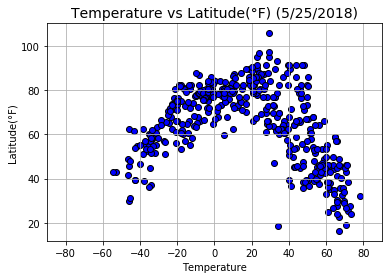

In [7]:

# Temperature vs Latitude(F)
plt.scatter(x=weather_data["Latitude"],y=weather_data["Temperature"],facecolors="blue",edgecolors="black")
plotprops("Temperature","Latitude(°F)",[-90,90])

plt.show()

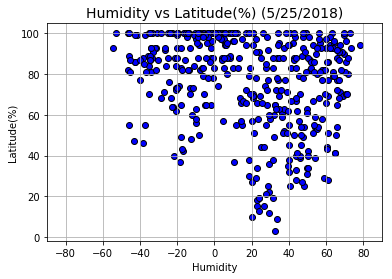

In [8]:
# Humidity vs Latitude

plt.scatter(x=weather_data["Latitude"],y=weather_data["Humidity"],facecolors="blue",edgecolors="black")
plotprops("Humidity","Latitude(%)",[-90,90])

plt.show()

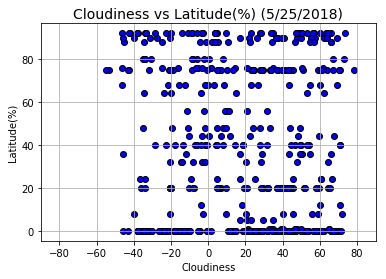

In [9]:
# Cloudiness vs Latitude

plt.scatter(x=weather_data["Latitude"],y=weather_data["Cloudliness"],facecolors="blue",edgecolors="black")
plotprops("Cloudiness","Latitude(%)",[-90,90])

plt.show()

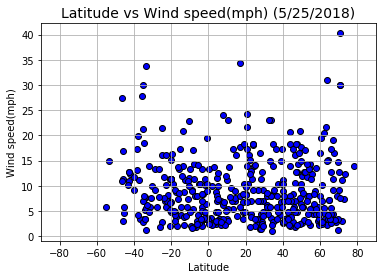

In [10]:

# Wind Speed vs Latitude  

plt.scatter(x=weather_data["Latitude"],y=weather_data["Wind speed"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Wind speed(mph)",[-90,90])

plt.show()